In [94]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv


In [95]:
train_df = pd.read_csv("../input/fashionmnist/fashion-mnist_train.csv")
test_df = pd.read_csv("../input/fashionmnist/fashion-mnist_test.csv")
print(train_df.shape)
print(test_df.shape)

(60000, 785)
(10000, 785)


In [96]:
train_df.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0


In [97]:
train_X = train_df.drop(['label'],axis=1)


In [98]:
train_X.shape

(60000, 784)

In [99]:
train_Y = train_df['label']
train_Y.shape

(60000,)

In [100]:
test_X = test_df.drop(['label'],axis=1)
test_Y = test_df['label']

In [101]:
train_X = np.array(train_X, dtype = 'float32')
test_X = np.array(test_X,dtype='float32')
train_Y = np.array(train_Y, dtype = 'float32')
test_Y = np.array(test_Y,dtype='float32')

In [102]:
train_X = train_X / 255.0
test_X = test_X / 255.0

In [103]:
from keras.utils import to_categorical
train_Y=to_categorical(train_Y)
print(train_Y)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [104]:
image_rows = 28
image_cols = 28

image_shape = (image_rows,image_cols,1)

In [105]:
train_X = train_X.reshape(train_X.shape[0],*image_shape)
test_X = test_X.reshape(test_X.shape[0],*image_shape)

test_X.shape

(10000, 28, 28, 1)

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


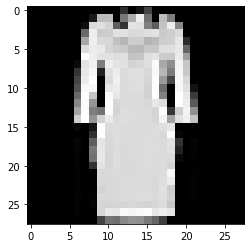

In [106]:
from matplotlib import pyplot as plt
%matplotlib inline 
print(train_Y[4])
plt.imshow(train_X[4].squeeze())
plt.gray()

In [107]:
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout

In [108]:
num_of_classes = 10

In [109]:
model = Sequential()
model.add(Conv2D(20, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(image_rows, image_rows, 1)))
model.add(Conv2D(20, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_of_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])
model.fit(train_X, train_Y,
          batch_size=128,
          epochs=25,
          validation_split = 0.2)

Epoch 1/25
750/750 [==============================] - 3s 4ms/step - loss: 0.4428 - accuracy: 0.8418 - val_loss: 0.3812 - val_accuracy: 0.8633
Epoch 2/25
750/750 [==============================] - 3s 5ms/step - loss: 0.2912 - accuracy: 0.8931 - val_loss: 0.2987 - val_accuracy: 0.8950
Epoch 3/25
750/750 [==============================] - 3s 4ms/step - loss: 0.2315 - accuracy: 0.9141 - val_loss: 0.2706 - val_accuracy: 0.9032
Epoch 4/25
750/750 [==============================] - 3s 4ms/step - loss: 0.1819 - accuracy: 0.9324 - val_loss: 0.2712 - val_accuracy: 0.9055
Epoch 5/25
750/750 [==============================] - 3s 4ms/step - loss: 0.1396 - accuracy: 0.9491 - val_loss: 0.2738 - val_accuracy: 0.9099
Epoch 6/25
750/750 [==============================] - 3s 4ms/step - loss: 0.1050 - accuracy: 0.9618 - val_loss: 0.2914 - val_accuracy: 0.9043
Epoch 7/25
750/750 [==============================] - 3s 4ms/step - loss: 0.0781 - accuracy: 0.9719 - val_loss: 0.3085 - val_accuracy: 0.9092
Epoch 

In [110]:
test_Y = to_categorical(test_Y)
score = model.evaluate(test_X, test_Y, verbose=0)

In [111]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7101559042930603
Test accuracy: 0.9072999954223633
